---
# **Labeling type of gait & ZUPT intervals**
---



Eudald Sangenis

---
## **1. Libraries**
---

In [34]:
# Libraries:
import os
import sys
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

In [35]:
# 2022_03_17 - Subject I - Chico
# 2022_07_27 - Subject II - Eudald
# 2022_08_01 - Subject III - Austin
data = '2022_08_01'

if data == '2022_03_17':
    subject = 'I'
elif data == '2022_07_27':
    subject = 'II'
elif data ==  '2022_08_01':
    subject = 'III'
else:
    print('No subject selected as the datasets does not exist')
    sys.exit()

---
## **2. Functions**
---

In [36]:
import signal_processing_functions as sp

---
## **3. Data Handling**
---

#### **3.1 Read Datasets -> Pandas**

In [37]:
current_directory = os.getcwd()
print("Current directory: " + current_directory)

# Define a list of experiment names and corresponding speeds
experiment_names = [
    ('exp100_VN', 'walk 60 steps/s'),
    ('exp200_VN', 'walk 60 steps/s'),
    ('exp300_VN', 'walk 90 steps/s'),
    ('exp400_VN', 'walk 90 steps/s'),
    ('exp500_VN', 'jog 120 steps/s'),
    ('exp600_VN', 'jog 120 steps/s'),
    ('exp700_VN', 'run 150 steps/s'),
    ('exp800_VN', 'run 150 steps/s'),
    ('exp900_VN', 'sprint 180 steps/s'),
    ('exp1000_VN', 'sprint 180 steps/s'),
    ('exp1100_VN', 'walk backward 60 steps/s'),
    ('exp1200_VN', 'walk backward 60 steps/s'),
    ('exp1300_VN', 'jog backward 90 steps/s'),
    ('exp1400_VN', 'jog backward 90 steps/s'),
    ('exp1500_VN', 'side step right 90 steps/s'),
    ('exp1600_VN', 'side step right 90 steps/s'),
    ('exp1700_VN', 'side step right 90 steps/s'),
    ('exp1800_VN', 'side step right 90 steps/s')
]

data_folder = os.path.join(current_directory, '1_unlabeled_datasets', data)
exp_df_lst = [sp.mat2pandas(data_folder + os.sep, exp_name) for exp_name, _ in experiment_names]

# Assign datasets to variables for easy access
exp_100_df, exp_200_df = exp_df_lst[0], exp_df_lst[1]
exp_300_df, exp_400_df = exp_df_lst[2], exp_df_lst[3]
exp_500_df, exp_600_df = exp_df_lst[4], exp_df_lst[5]
exp_700_df, exp_800_df = exp_df_lst[6], exp_df_lst[7]
exp_900_df, exp_1000_df = exp_df_lst[8], exp_df_lst[9]
exp_1100_df, exp_1200_df = exp_df_lst[10], exp_df_lst[11]
exp_1300_df, exp_1400_df = exp_df_lst[12], exp_df_lst[13]
exp_1500_df, exp_1600_df = exp_df_lst[14], exp_df_lst[15]
exp_1700_df, exp_1800_df = exp_df_lst[16], exp_df_lst[17]

Current directory: c:\Users\Eudald\OneDrive - personalmicrosoftsoftware.uci.edu\NEVERLOST\01_Quarterly_Reports_&_publications\2024 IEEE JSPIN - SVM Journal\Motion Classification


In [38]:
# Empty dataframes:
sp_100_df = pd.DataFrame();  sp_200_df = pd.DataFrame()
sp_300_df = pd.DataFrame();  sp_400_df = pd.DataFrame()
sp_500_df = pd.DataFrame();  sp_600_df = pd.DataFrame()
sp_700_df = pd.DataFrame();  sp_800_df = pd.DataFrame()
sp_900_df = pd.DataFrame();  sp_1000_df = pd.DataFrame()
sp_1100_df = pd.DataFrame(); sp_1200_df = pd.DataFrame()
sp_1300_df = pd.DataFrame(); sp_1400_df = pd.DataFrame()
sp_1500_df = pd.DataFrame(); sp_1600_df = pd.DataFrame()
sp_1700_df = pd.DataFrame(); sp_1800_df = pd.DataFrame()
df_peaks_100 = pd.DataFrame(); df_peaks_200 = pd.DataFrame()
df_peaks_300 = pd.DataFrame(); df_peaks_400 = pd.DataFrame()
df_peaks_500 = pd.DataFrame(); df_peaks_600 = pd.DataFrame()
df_peaks_700 = pd.DataFrame(); df_peaks_800 = pd.DataFrame()
df_peaks_900 = pd.DataFrame(); df_peaks_1000 = pd.DataFrame()
df_peaks_1100 = pd.DataFrame(); df_peaks_1200 = pd.DataFrame()
df_peaks_1300 = pd.DataFrame(); df_peaks_1400 = pd.DataFrame()
df_peaks_1500 = pd.DataFrame(); df_peaks_1600 = pd.DataFrame()
df_peaks_1700 = pd.DataFrame(); df_peaks_1800 = pd.DataFrame()

#### **3.2 Compute the magnitude**
In this section the magnitude of the acceleration and the angular velocity is computed.

Magnitude formula:

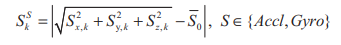

In [39]:
## Compute the magnitude of the acceleration and angular velocity
exp_df = (exp_100_df, exp_200_df, exp_300_df, exp_400_df, exp_500_df,
          exp_600_df, exp_700_df, exp_800_df, exp_900_df, exp_1000_df,
          exp_1100_df, exp_1200_df, exp_1300_df, exp_1400_df, exp_1500_df,
          exp_1600_df, exp_1700_df, exp_1800_df)
window = (50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50)
sp_df = map(sp.magnitude, exp_df, window); 
sp_df_lst = list(sp_df);
for i in range(0,len(sp_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800];
    exec(f'sp_{x[i]}_df = sp_df_lst[i]')

#### **3.2 Plots Signals & Conclusion**

In this section is evaluated the effect of trying to smooth the signal with a rolling window. This way, the ZUPT can be identified easily.

Rolling window formula (W=window):

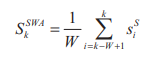

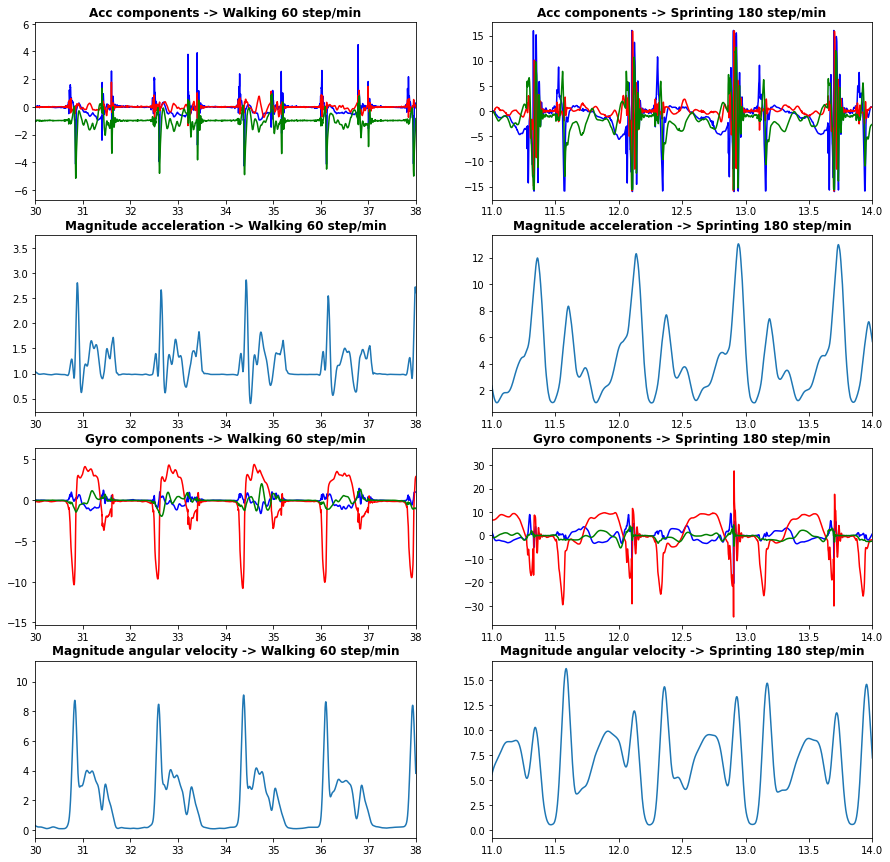

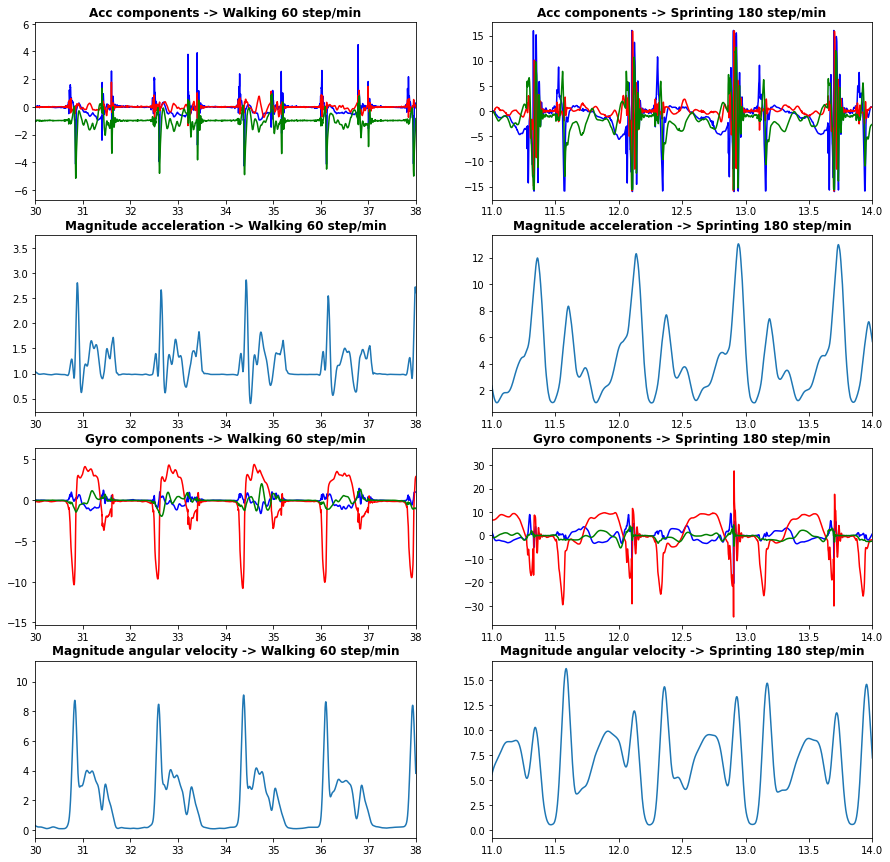

In [40]:
sp.plot8(exp_100_df,exp_900_df,sp_100_df,sp_900_df,30,38,11,14,50)

After analyzing the effect of the rolling window to make our dataset signal smoother, it is conclude that a useful value of window is 50.

---
## **4. Labeling**
---

To label the Zero Velocity Update it will be taken the gyroscope magnitude signal as a reference.

#### **4.1 Find local maximums -- PPSW Algorithm**

Positive Peak Detection from the Sliding Window dataset:

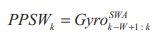

In [41]:
p = 0.5
PP_sp_100_df, _ = find_peaks(sp_100_df['gyro'], prominence = p); PP_sp_200_df, _ = find_peaks(sp_200_df['gyro'], prominence = p);
PP_sp_300_df, _ = find_peaks(sp_300_df['gyro'], prominence = p); PP_sp_400_df, _ = find_peaks(sp_400_df['gyro'], prominence = p);
PP_sp_500_df, _ = find_peaks(sp_500_df['gyro'], prominence = p); PP_sp_600_df, _ = find_peaks(sp_600_df['gyro'], prominence = p);
PP_sp_700_df, _ = find_peaks(sp_700_df['gyro'], prominence = p); PP_sp_800_df, _ = find_peaks(sp_800_df['gyro'], prominence = p);
PP_sp_900_df, _ = find_peaks(sp_900_df['gyro'], prominence = p); PP_sp_1000_df, _ = find_peaks(sp_1000_df['gyro'], prominence = p);
PP_sp_1100_df, _ = find_peaks(sp_1100_df['gyro'], prominence = p); PP_sp_1200_df, _ = find_peaks(sp_1200_df['gyro'], prominence = p);
PP_sp_1300_df, _ = find_peaks(sp_1300_df['gyro'], prominence = p); PP_sp_1400_df, _ = find_peaks(sp_1400_df['gyro'], prominence = p);
PP_sp_1500_df, _ = find_peaks(sp_1500_df['gyro'], prominence = p); PP_sp_1600_df, _ = find_peaks(sp_1600_df['gyro'], prominence = p);
PP_sp_1700_df, _ = find_peaks(sp_1700_df['gyro'], prominence = p); PP_sp_1800_df, _ = find_peaks(sp_1800_df['gyro'], prominence = p);

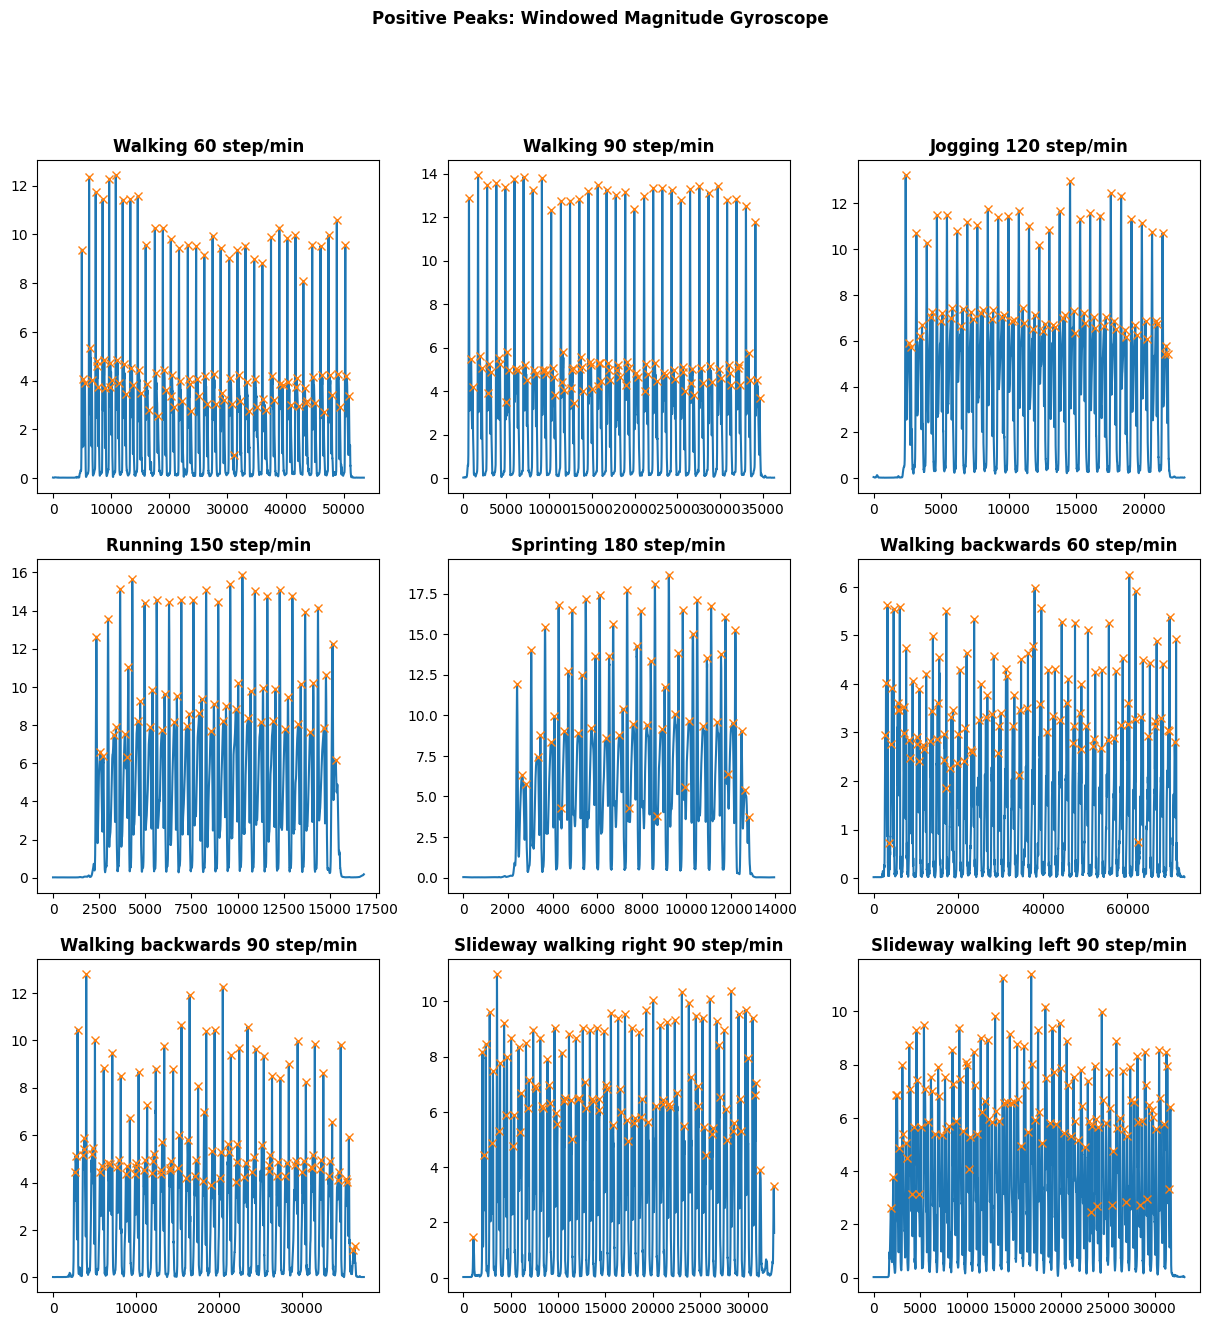

In [42]:
sp.plot_PP(sp_100_df,sp_300_df,sp_500_df,sp_700_df,sp_900_df,sp_1100_df,sp_1300_df,sp_1500_df,sp_1700_df,
            PP_sp_100_df,PP_sp_300_df,PP_sp_500_df,PP_sp_700_df,PP_sp_900_df,PP_sp_1100_df,PP_sp_1300_df,PP_sp_1500_df,PP_sp_1700_df)

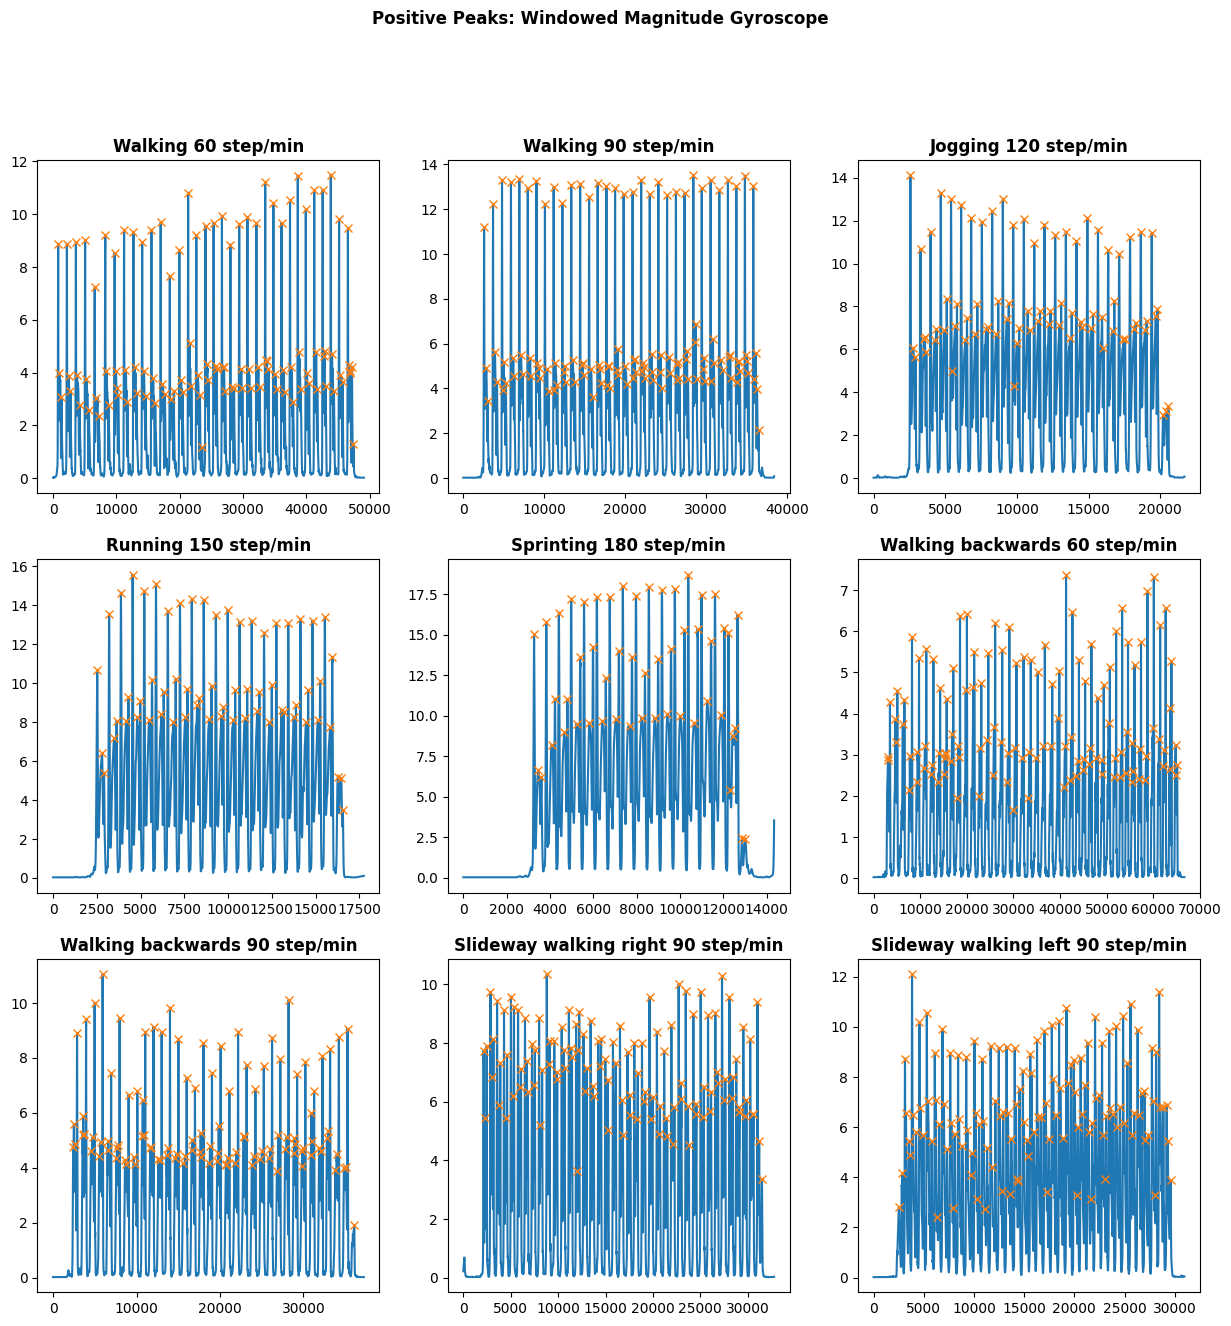

In [43]:
sp.plot_PP(sp_200_df,sp_400_df,sp_600_df,sp_800_df,sp_1000_df,sp_1200_df,sp_1400_df,sp_1600_df,sp_1800_df,
        PP_sp_200_df,PP_sp_400_df,PP_sp_600_df,PP_sp_800_df,PP_sp_1000_df,PP_sp_1200_df,PP_sp_1400_df,PP_sp_1600_df,PP_sp_1800_df)

#### **4.2 Find local minimums -- NPSW Algorithm**

Negative Peak Detection from the Sliding Window dataset:

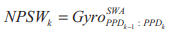

In [44]:
# Parametes:
if subject == 'I':
    p = 6; d = 400
    # Walk 60
    NP_sp_100_df, _ = find_peaks(-sp_100_df['gyro'], distance = d ,prominence = p); NP_sp_200_df, _ = find_peaks(-sp_200_df['gyro'], distance = d ,prominence = p);
    # Walk 90
    NP_sp_300_df, _ = find_peaks(-sp_300_df['gyro'], distance = d, prominence = p); NP_sp_400_df, _ = find_peaks(-sp_400_df['gyro'], distance = d ,prominence = p);
    # Jog 120
    NP_sp_500_df, _ = find_peaks(-sp_500_df['gyro'], distance = d, prominence = p); NP_sp_600_df, _ = find_peaks(-sp_600_df['gyro'], distance = d ,prominence = p);
    # Run 150
    NP_sp_700_df, _ = find_peaks(-sp_700_df['gyro'], distance = d, prominence = p); NP_sp_800_df, _ = find_peaks(-sp_800_df['gyro'], distance = d ,prominence = p);
    # Sprint 180
    NP_sp_900_df, _ = find_peaks(-sp_900_df['gyro'], distance = d, prominence = p); NP_sp_1000_df, _ = find_peaks(-sp_1000_df['gyro'], distance = d ,prominence = p);
    # Walk b 60
    NP_sp_1100_df, _ = find_peaks(-sp_1100_df['gyro'], distance = 600 ,prominence = 3); NP_sp_1200_df, _ = find_peaks(-sp_1200_df['gyro'], distance = 600 ,prominence = 3);
    # Walk b 90
    NP_sp_1300_df, _ = find_peaks(-sp_1300_df['gyro'], distance = d ,prominence = 5); NP_sp_1400_df, _ = find_peaks(-sp_1400_df['gyro'], distance = d ,prominence = 3.5);
    # Walk side R
    NP_sp_1500_df, _ = find_peaks(-sp_1500_df['gyro'], distance = d ,prominence = p); NP_sp_1600_df, _ = find_peaks(-sp_1600_df['gyro'], distance = d ,prominence = p);
    # Walk side L
    NP_sp_1700_df, _ = find_peaks(-sp_1700_df['gyro'], distance = 350 ,prominence = 5); NP_sp_1800_df, _ = find_peaks(-sp_1800_df['gyro'], distance = 350 ,prominence = 3.5);

if subject == 'II':
    p = 5; d = 400
    # Walk 60
    NP_sp_100_df, _ = find_peaks(-sp_100_df['gyro'], distance = d ,prominence = p); NP_sp_200_df, _ = find_peaks(-sp_200_df['gyro'], distance = d ,prominence = p);
    # Walk 90
    NP_sp_300_df, _ = find_peaks(-sp_300_df['gyro'], distance = d, prominence = p); NP_sp_400_df, _ = find_peaks(-sp_400_df['gyro'], distance = d ,prominence = p);
    # Jog 120
    NP_sp_500_df, _ = find_peaks(-sp_500_df['gyro'], distance = d, prominence = 10); NP_sp_600_df, _ = find_peaks(-sp_600_df['gyro'], distance = d ,prominence = p);
    # Run 150
    NP_sp_700_df, _ = find_peaks(-sp_700_df['gyro'], distance = d, prominence = p); NP_sp_800_df, _ = find_peaks(-sp_800_df['gyro'], distance = d ,prominence = p);
    # Sprint 180
    NP_sp_900_df, _ = find_peaks(-sp_900_df['gyro'], distance = d, prominence = p); NP_sp_1000_df, _ = find_peaks(-sp_1000_df['gyro'], distance = d ,prominence = p);
    # Walk b 60
    NP_sp_1100_df, _ = find_peaks(-sp_1100_df['gyro'], distance = 1000 ,prominence = 0.05); NP_sp_1200_df, _ = find_peaks(-sp_1200_df['gyro'], distance = 1000 ,prominence = 5);
    # Walk b 90
    NP_sp_1300_df, _ = find_peaks(-sp_1300_df['gyro'], distance = 650 ,prominence = 0.5); NP_sp_1400_df, _ = find_peaks(-sp_1400_df['gyro'], distance = 650 ,prominence = 0.5);
    # Walk side R
    NP_sp_1500_df, _ = find_peaks(-sp_1500_df['gyro'], distance = d ,prominence = p); NP_sp_1600_df, _ = find_peaks(-sp_1600_df['gyro'], distance = d ,prominence = p);
    # Walk side L
    NP_sp_1700_df, _ = find_peaks(-sp_1700_df['gyro'], distance = 350 ,prominence = 10); NP_sp_1800_df, _ = find_peaks(-sp_1800_df['gyro'], distance = 450 ,prominence = p); #3.5

if subject == 'III':
    p = 5; d = 400
    # Walk 60
    NP_sp_100_df, _ = find_peaks(-sp_100_df['gyro'], distance = d ,prominence = p); NP_sp_200_df, _ = find_peaks(-sp_200_df['gyro'], distance = d ,prominence = p);
    # Walk 90
    NP_sp_300_df, _ = find_peaks(-sp_300_df['gyro'], distance = d, prominence = p); NP_sp_400_df, _ = find_peaks(-sp_400_df['gyro'], distance = d ,prominence = p);
    # Jog 120
    NP_sp_500_df, _ = find_peaks(-sp_500_df['gyro'], distance = d, prominence = 8); NP_sp_600_df, _ = find_peaks(-sp_600_df['gyro'], distance = d ,prominence = p);
    # Run 150
    NP_sp_700_df, _ = find_peaks(-sp_700_df['gyro'], distance = d, prominence = p); NP_sp_800_df, _ = find_peaks(-sp_800_df['gyro'], distance = d ,prominence = p);
    # Sprint 180
    NP_sp_900_df, _ = find_peaks(-sp_900_df['gyro'], distance = d, prominence = p); NP_sp_1000_df, _ = find_peaks(-sp_1000_df['gyro'], distance = d ,prominence = p);
    # Walk b 60
    NP_sp_1100_df, _ = find_peaks(-sp_1100_df['gyro'], distance = 1000 ,prominence = 0.05); NP_sp_1200_df, _ = find_peaks(-sp_1200_df['gyro'], distance = 1000 ,prominence = 4);
    # Walk b 90
    NP_sp_1300_df, _ = find_peaks(-sp_1300_df['gyro'], distance = 650 ,prominence = 0.5); NP_sp_1400_df, _ = find_peaks(-sp_1400_df['gyro'], distance = 650 ,prominence = 0.5);
    # Walk side R
    NP_sp_1500_df, _ = find_peaks(-sp_1500_df['gyro'], distance = d ,prominence = p); NP_sp_1600_df, _ = find_peaks(-sp_1600_df['gyro'], distance = d ,prominence = 7);
    # Walk side L
    NP_sp_1700_df, _ = find_peaks(-sp_1700_df['gyro'], distance = 350 ,prominence = 6); NP_sp_1800_df, _ = find_peaks(-sp_1800_df['gyro'], distance = 450 ,prominence = p); #3.5

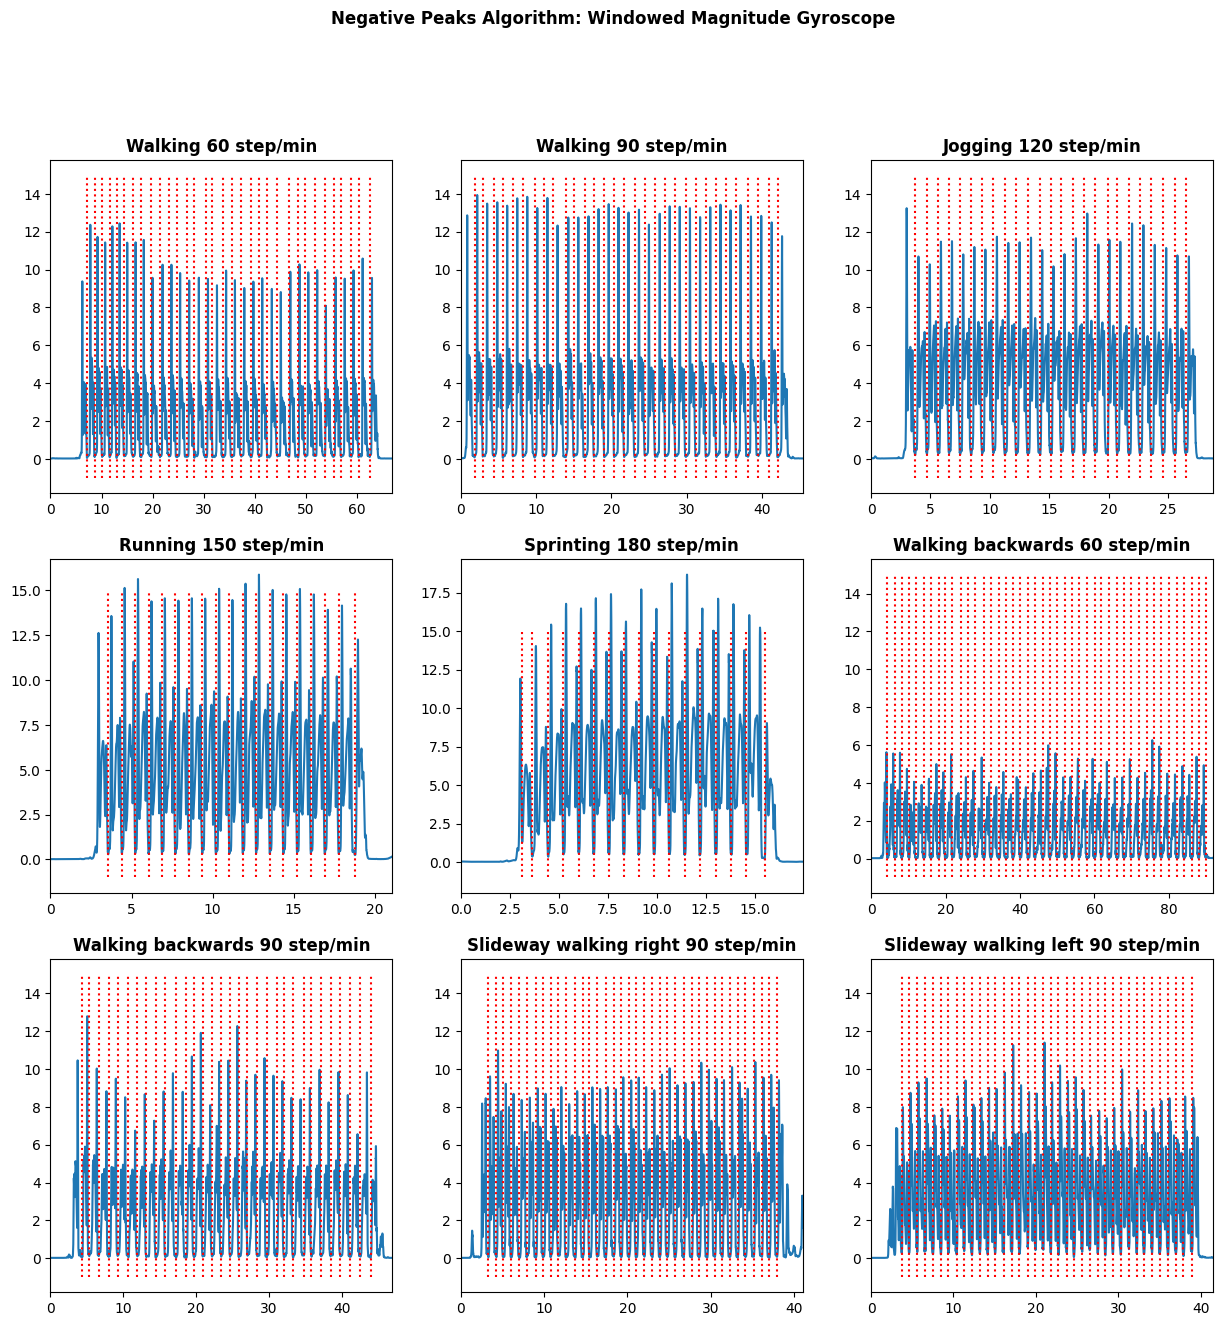

In [45]:
sp.plot_NP(sp_100_df,sp_300_df,sp_500_df,sp_700_df,sp_900_df,sp_1100_df,sp_1300_df,sp_1500_df,sp_1700_df,
        NP_sp_100_df,NP_sp_300_df,NP_sp_500_df,NP_sp_700_df,NP_sp_900_df,NP_sp_1100_df,NP_sp_1300_df,NP_sp_1500_df,NP_sp_1700_df)

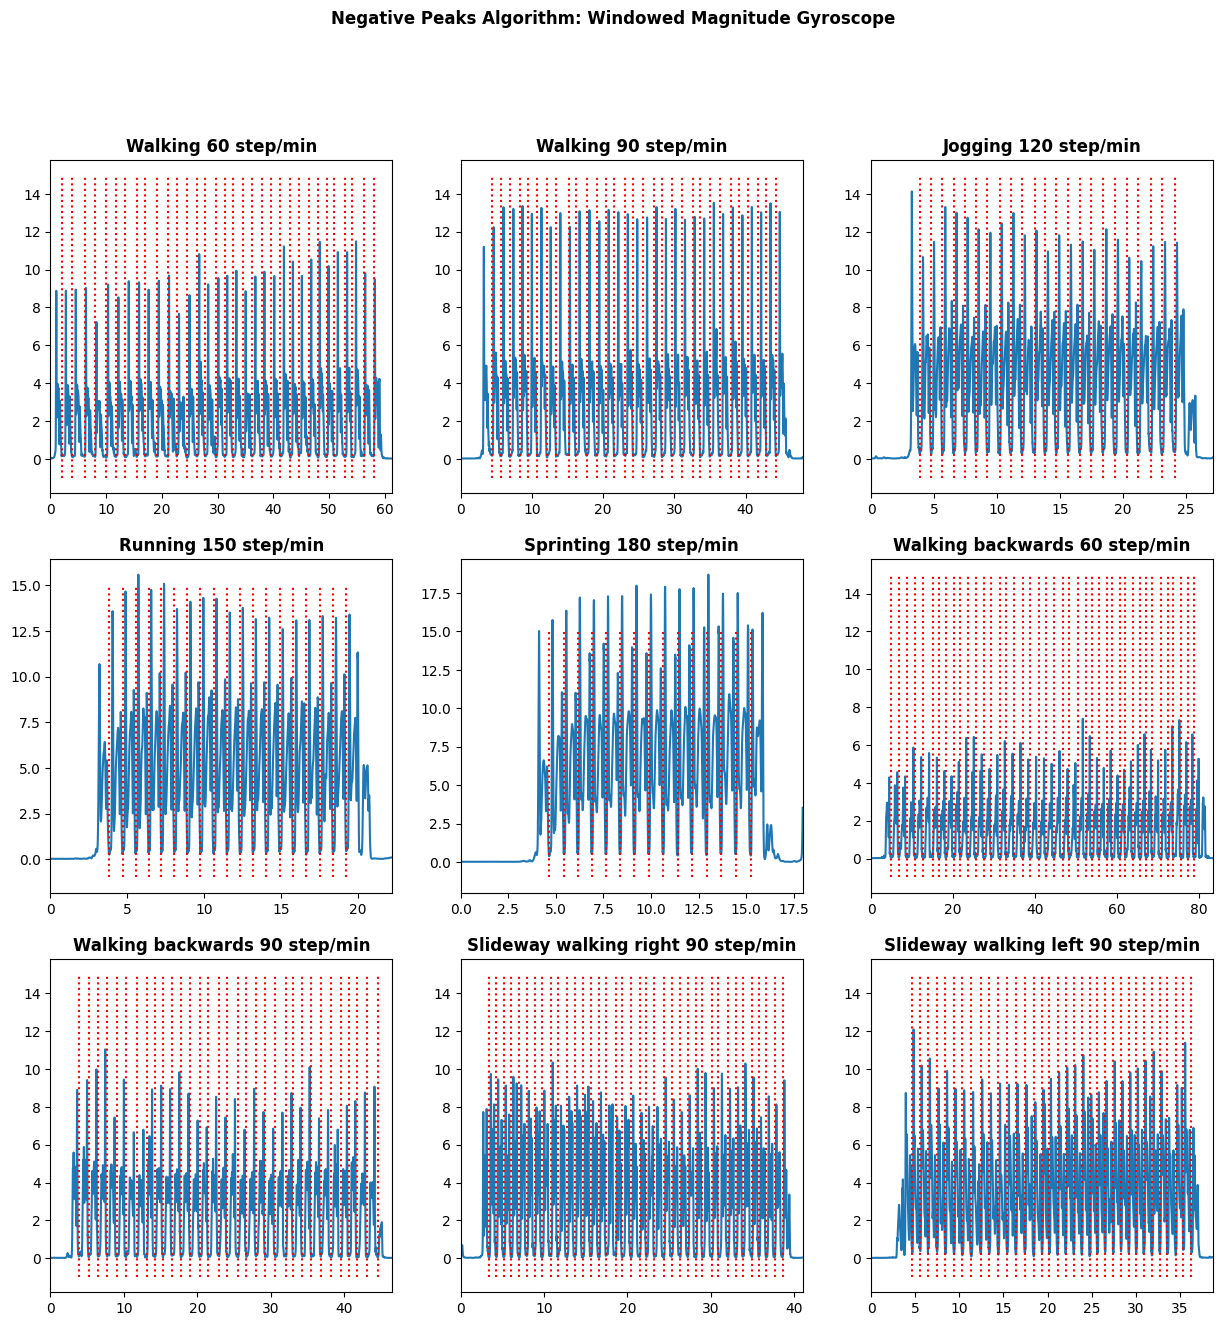

In [46]:
sp.plot_NP(sp_200_df,sp_400_df,sp_600_df,sp_800_df,sp_1000_df,sp_1200_df,sp_1400_df,sp_1600_df,sp_1800_df,
        NP_sp_200_df,NP_sp_400_df,NP_sp_600_df,NP_sp_800_df,NP_sp_1000_df,NP_sp_1200_df,NP_sp_1400_df,NP_sp_1600_df,NP_sp_1800_df)

#### **4.3 Filter Maximums**

Objective have two maximums between minimums.

In [47]:
sp_df = (sp_100_df, sp_200_df, sp_300_df, sp_400_df, sp_500_df,
         sp_600_df, sp_700_df, sp_800_df, sp_900_df, sp_1000_df,
         sp_1100_df, sp_1200_df, sp_1300_df, sp_1400_df, sp_1500_df,
         sp_1600_df, sp_1700_df, sp_1800_df)
pp_df = (PP_sp_100_df, PP_sp_200_df, PP_sp_300_df, PP_sp_400_df, PP_sp_500_df,
         PP_sp_600_df, PP_sp_700_df, PP_sp_800_df, PP_sp_900_df, PP_sp_1000_df,
         PP_sp_1100_df, PP_sp_1200_df, PP_sp_1300_df, PP_sp_1400_df, PP_sp_1500_df,
         PP_sp_1600_df, PP_sp_1700_df, PP_sp_1800_df)
np_df = (NP_sp_100_df, NP_sp_200_df, NP_sp_300_df, NP_sp_400_df, NP_sp_500_df,
         NP_sp_600_df, NP_sp_700_df, NP_sp_800_df, NP_sp_900_df, NP_sp_1000_df,
         NP_sp_1100_df, NP_sp_1200_df, NP_sp_1300_df, NP_sp_1400_df, NP_sp_1500_df,
         NP_sp_1600_df, NP_sp_1700_df, NP_sp_1800_df)
df_peaks = map(sp.select_max_min, sp_df, pp_df, np_df)

In [48]:
df_peaks_lst = list(df_peaks); 
for i in range(0,len(df_peaks_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800];
    exec(f'df_peaks_{x[i]} = df_peaks_lst[i]')

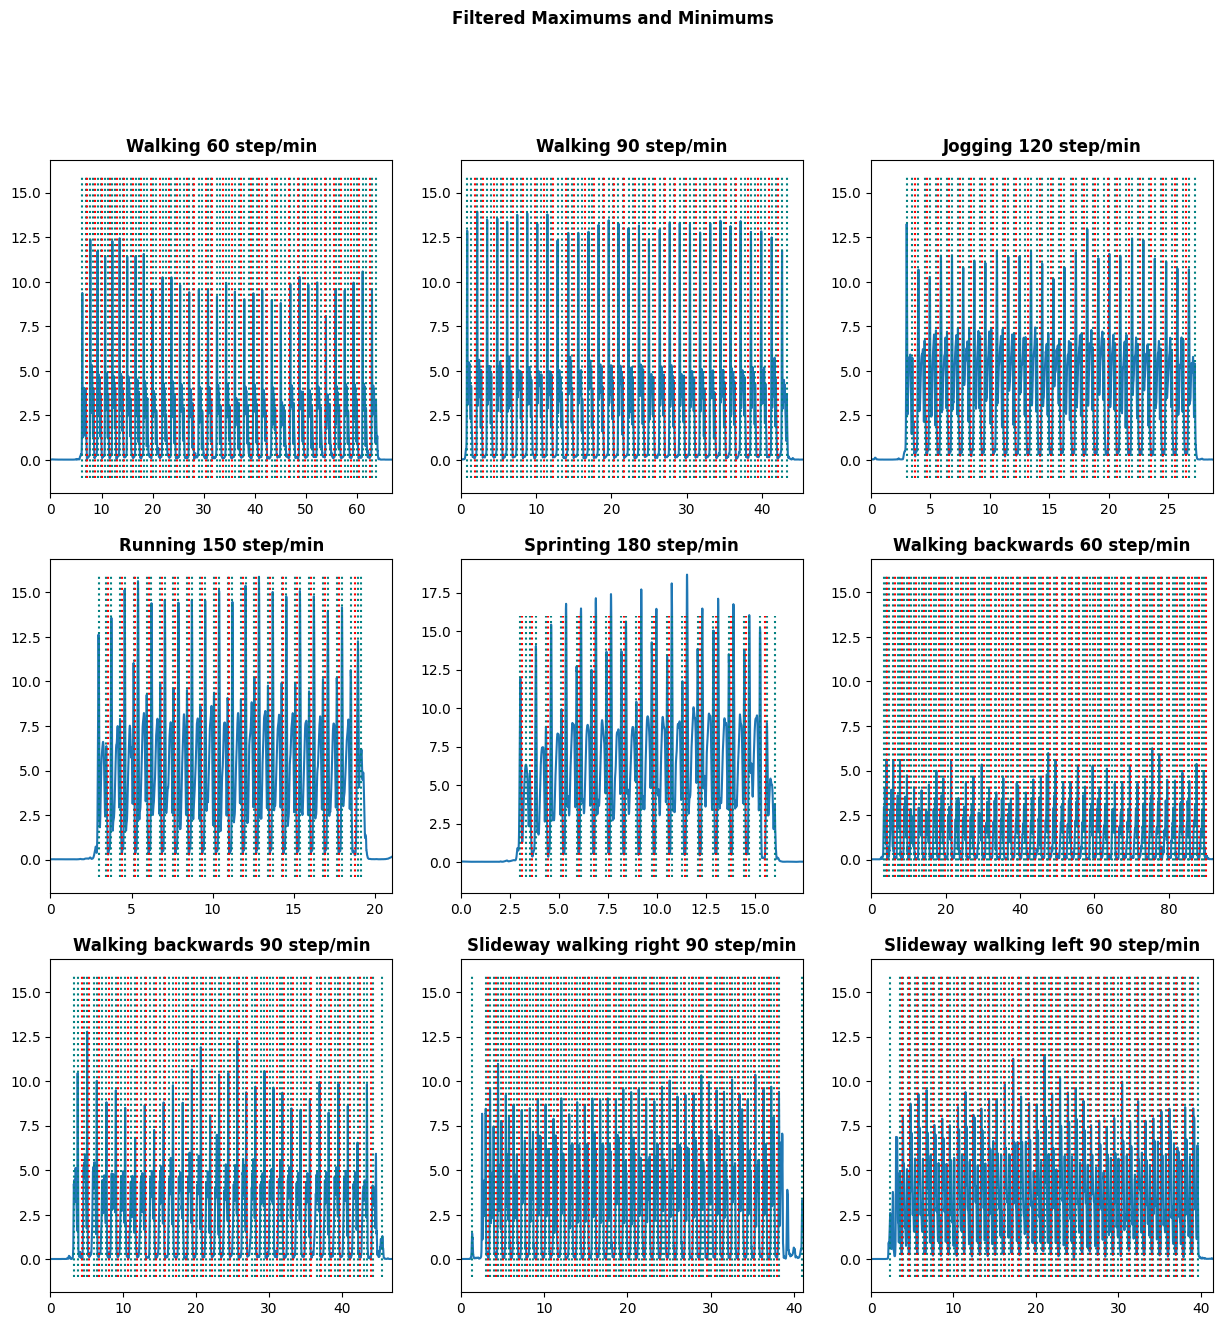

In [49]:
sp.plot_filter_max(sp_100_df,sp_300_df,sp_500_df,sp_700_df,sp_900_df,sp_1100_df,sp_1300_df,sp_1500_df,sp_1700_df,
                df_peaks_100,df_peaks_300,df_peaks_500,df_peaks_700,df_peaks_900,df_peaks_1100,df_peaks_1300,df_peaks_1500,df_peaks_1700)

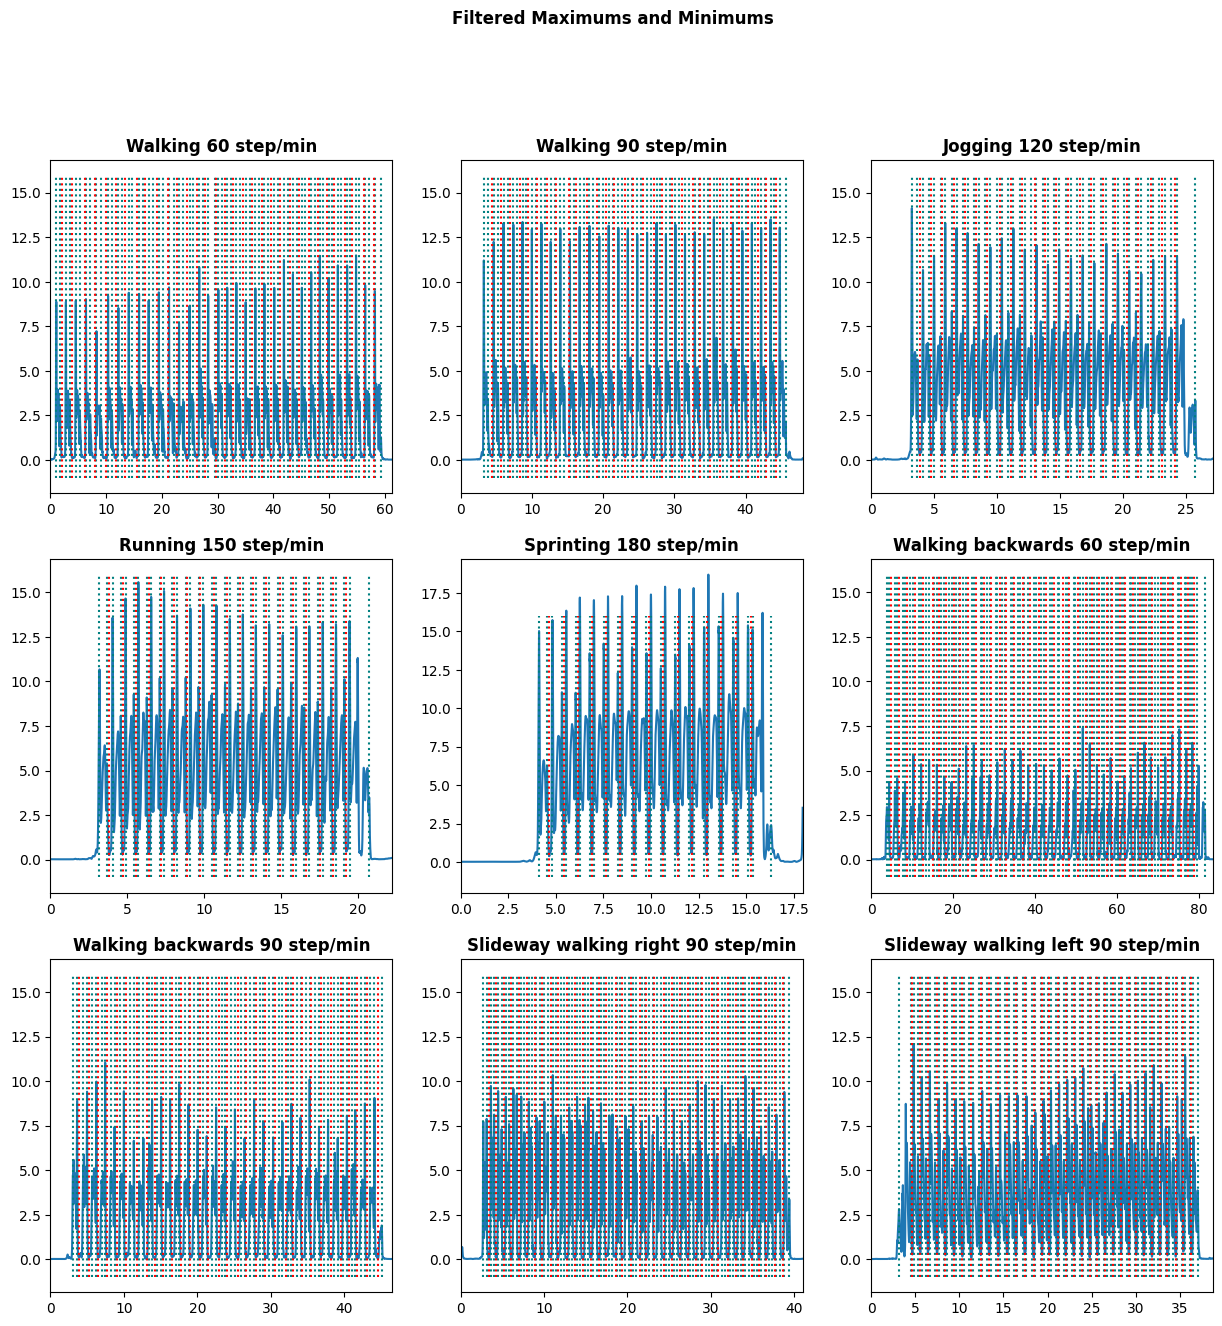

In [50]:
sp.plot_filter_max(sp_200_df,sp_400_df,sp_600_df,sp_800_df,sp_1000_df,sp_1200_df,sp_1400_df,sp_1600_df,sp_1800_df,
                df_peaks_200,df_peaks_400,df_peaks_600,df_peaks_800,df_peaks_1000,df_peaks_1200,df_peaks_1400,df_peaks_1600,df_peaks_1800)

#### **4.4 Label**

Objective label the ZUPT when we are between two PP and exisists between them a NP. Label in reference the NP value +5% is considered ZUPT.

In [51]:
sp_df = (sp_100_df, sp_200_df, sp_300_df, sp_400_df, sp_500_df,
         sp_600_df, sp_700_df, sp_800_df, sp_900_df, sp_1000_df,
         sp_1100_df, sp_1200_df, sp_1300_df, sp_1400_df, sp_1500_df,
         sp_1600_df, sp_1700_df, sp_1800_df)
peaks_df = (df_peaks_100, df_peaks_200, df_peaks_300, df_peaks_400, df_peaks_500,
            df_peaks_600, df_peaks_700, df_peaks_800, df_peaks_900, df_peaks_1000,
            df_peaks_1100, df_peaks_1200, df_peaks_1300, df_peaks_1400, df_peaks_1500,
            df_peaks_1600, df_peaks_1700, df_peaks_1800)
zupt_error = (5,5, 5,5, 1.7,1.7, 1.8,1.8, 1.5,1.5, 5,5, 2,2, 3,3, 3,3)
activities = ('walk_60', 'walk_60',
              'walk_90', 'walk_90',
              'jogg_120','jogg_120',
              'run_150','run_150',
              'sprint_180','sprint_180',
              'walk_b_60','walk_b_60',
              'walk_b_90','walk_b_90',
              'slide_right', 'slide_right',
              'slide_left', 'slide_left')
sp_df = map(sp.label, sp_df, peaks_df, zupt_error, activities)

In [52]:
sp_df_lst = list(sp_df)
for i in range(0,len(sp_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800];
    exec(f'sp_{x[i]}_df = sp_df_lst[i]')

c:\Users\Eudald\OneDrive - personalmicrosoftsoftware.uci.edu\NEVERLOST\01_Quarterly_Reports_&_publications\2024 IEEE JSPIN - SVM Journal\Motion Classification\signal_processing_functions.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'].iloc[j] = 'ZUPT';
c:\Users\Eudald\OneDrive - personalmicrosoftsoftware.uci.edu\NEVERLOST\01_Quarterly_Reports_&_publications\2024 IEEE JSPIN - SVM Journal\Motion Classification\signal_processing_functions.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'].iloc[j] = 'ZUPT_'+activity
c:\Users\Eudald\OneDrive - personalmicrosoftsoftware.uci.edu\NEVERLOST\01_Qua

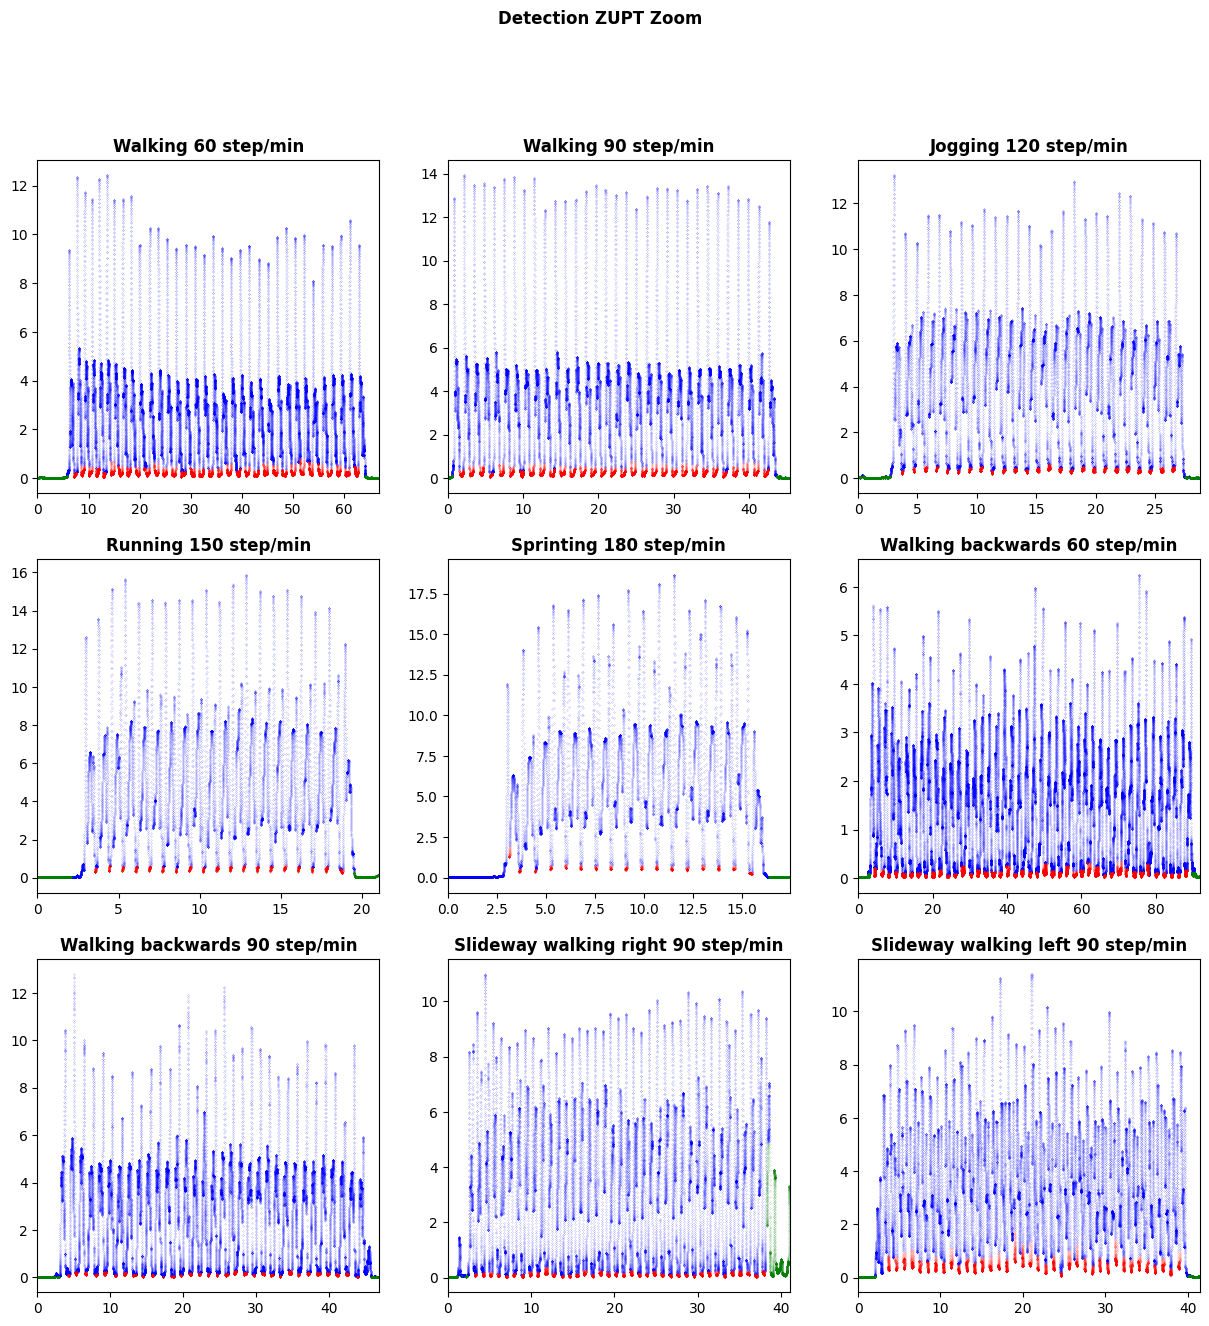

In [53]:
sp.plot_detection_zupt(sp_100_df,sp_300_df,sp_500_df,sp_700_df,sp_900_df,sp_1100_df,sp_1300_df,sp_1500_df,sp_1700_df,
                    0,max(sp_100_df['timestamp']), 0,max(sp_300_df['timestamp']), 0,max(sp_500_df['timestamp']),
                    0,max(sp_700_df['timestamp']), 0,max(sp_900_df['timestamp']), 0,max(sp_1100_df['timestamp']),
                    0,max(sp_1300_df['timestamp']), 0,max(sp_1500_df['timestamp']), 0,max(sp_1700_df['timestamp']))

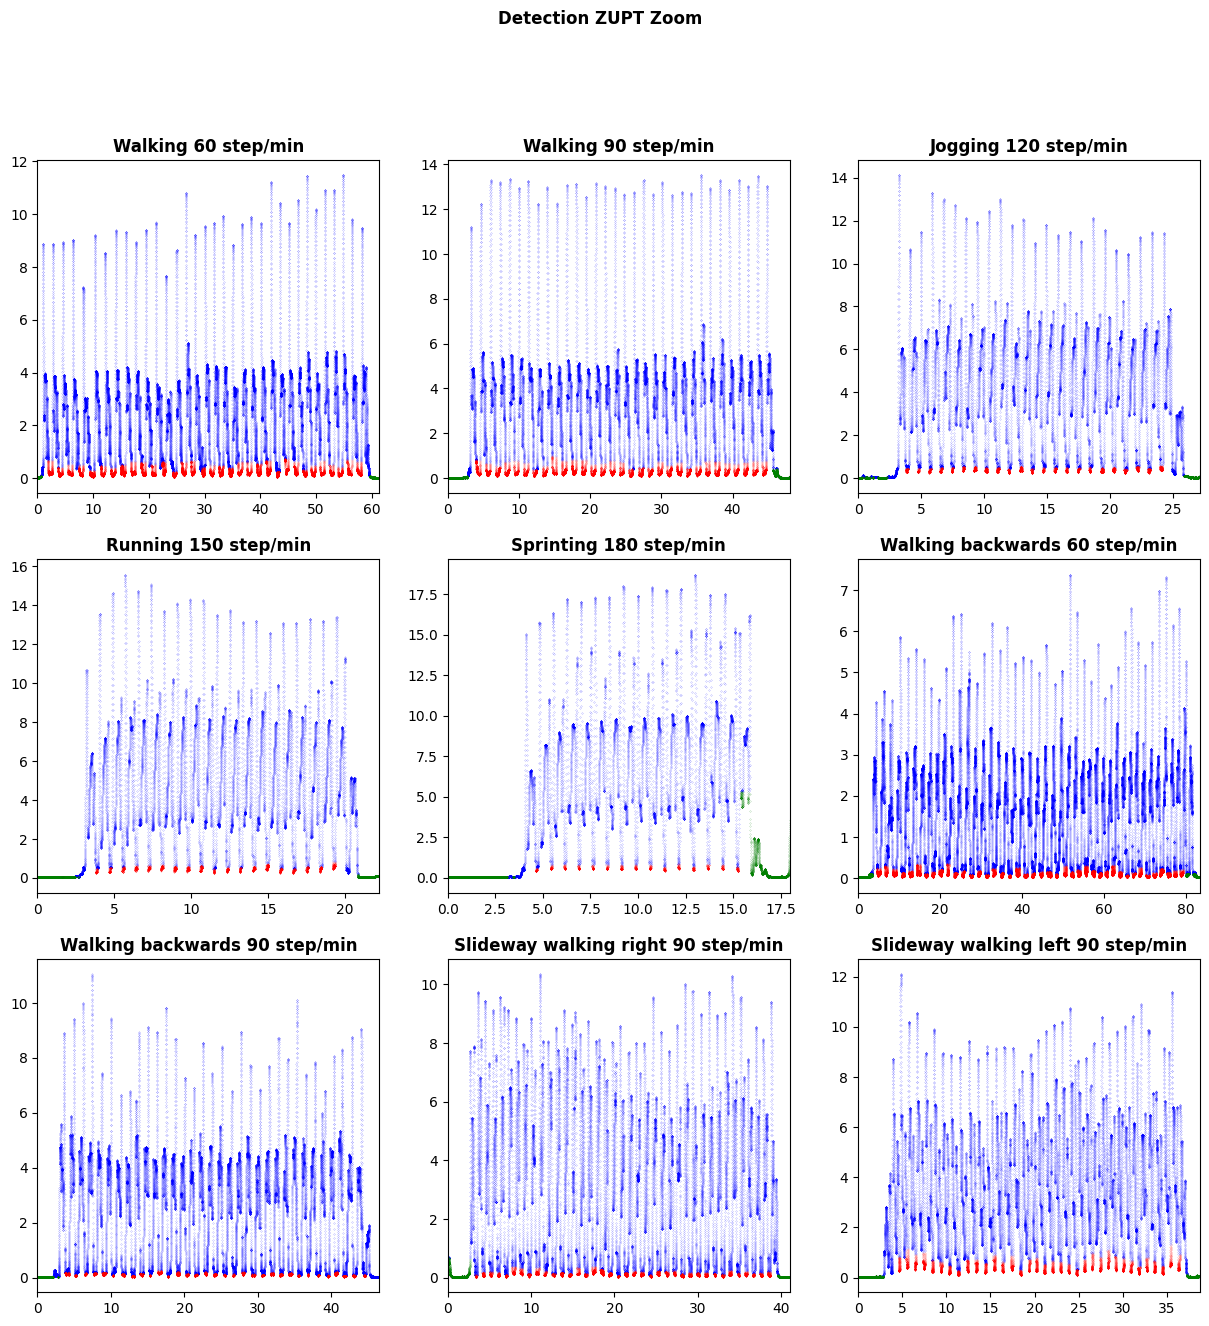

In [54]:
sp.plot_detection_zupt(sp_200_df,sp_400_df,sp_600_df,sp_800_df,sp_1000_df,sp_1200_df,sp_1400_df,sp_1600_df,sp_1800_df,
                    0,max(sp_200_df['timestamp']), 0,max(sp_400_df['timestamp']), 0,max(sp_600_df['timestamp']),
                    0,max(sp_800_df['timestamp']), 0,max(sp_1000_df['timestamp']), 0,max(sp_1200_df['timestamp']),
                    0,max(sp_1400_df['timestamp']), 0,max(sp_1600_df['timestamp']), 0,max(sp_1800_df['timestamp']))

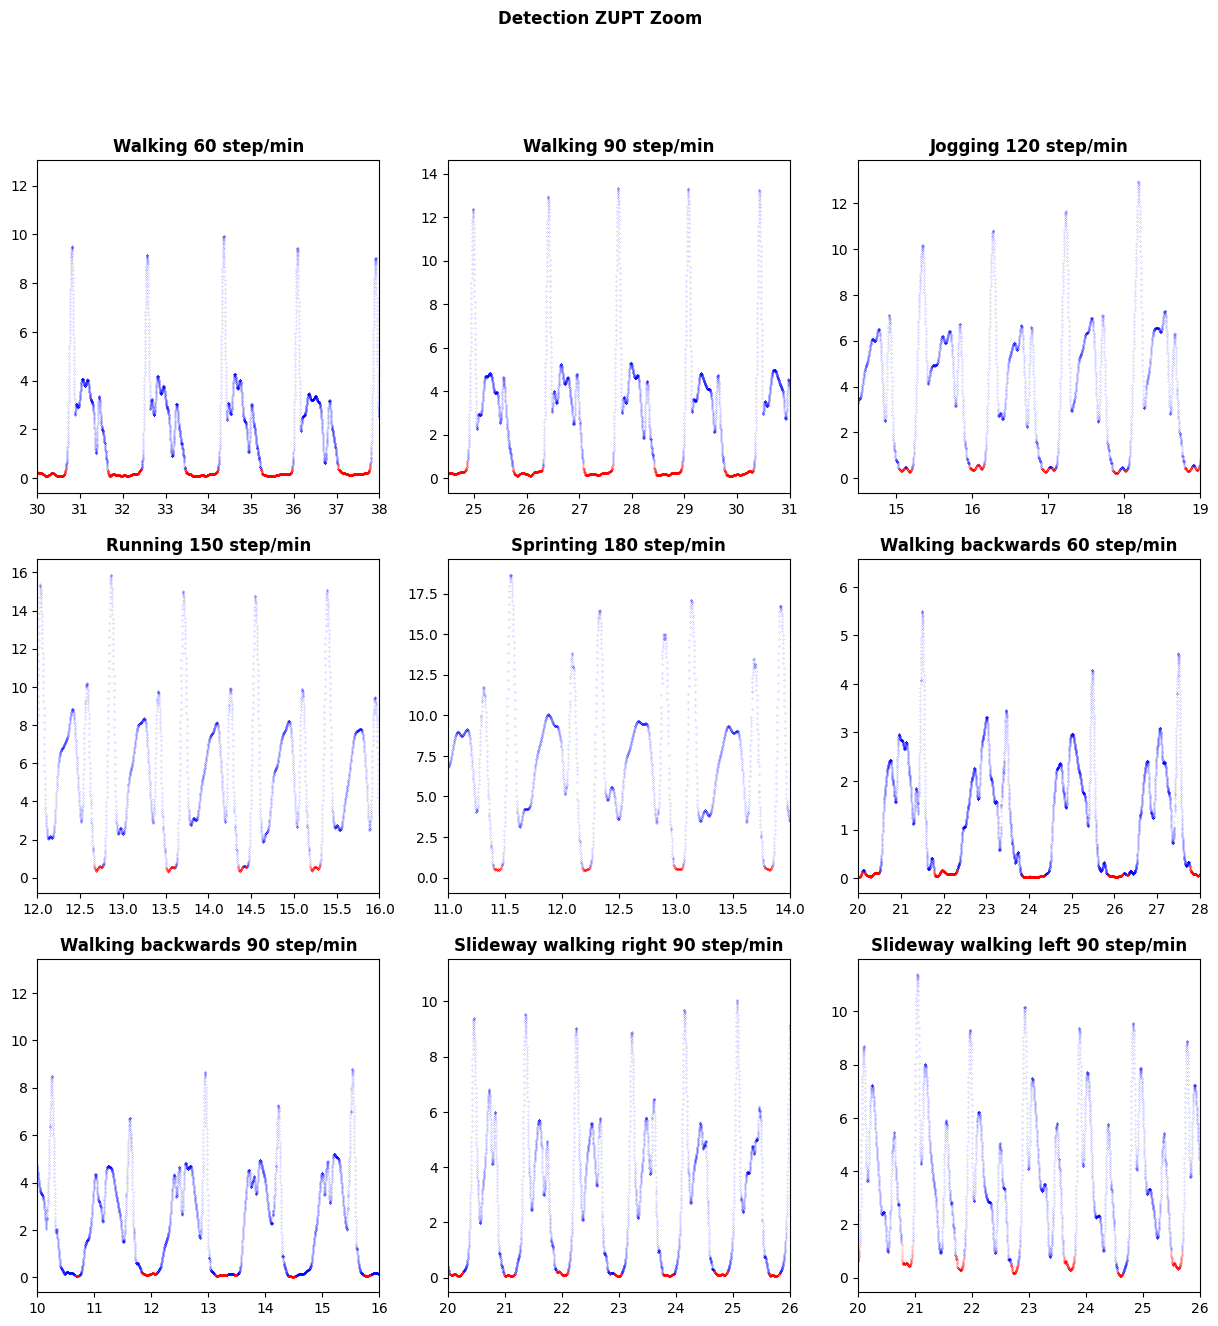

In [55]:
sp.plot_detection_zupt(sp_100_df,sp_300_df,sp_500_df,sp_700_df,sp_900_df,sp_1100_df,sp_1300_df,sp_1500_df,sp_1700_df,
                    30,38,24.5,31,14.5,19,12,16,11,14,20,28,10,16,20,26,20,26)

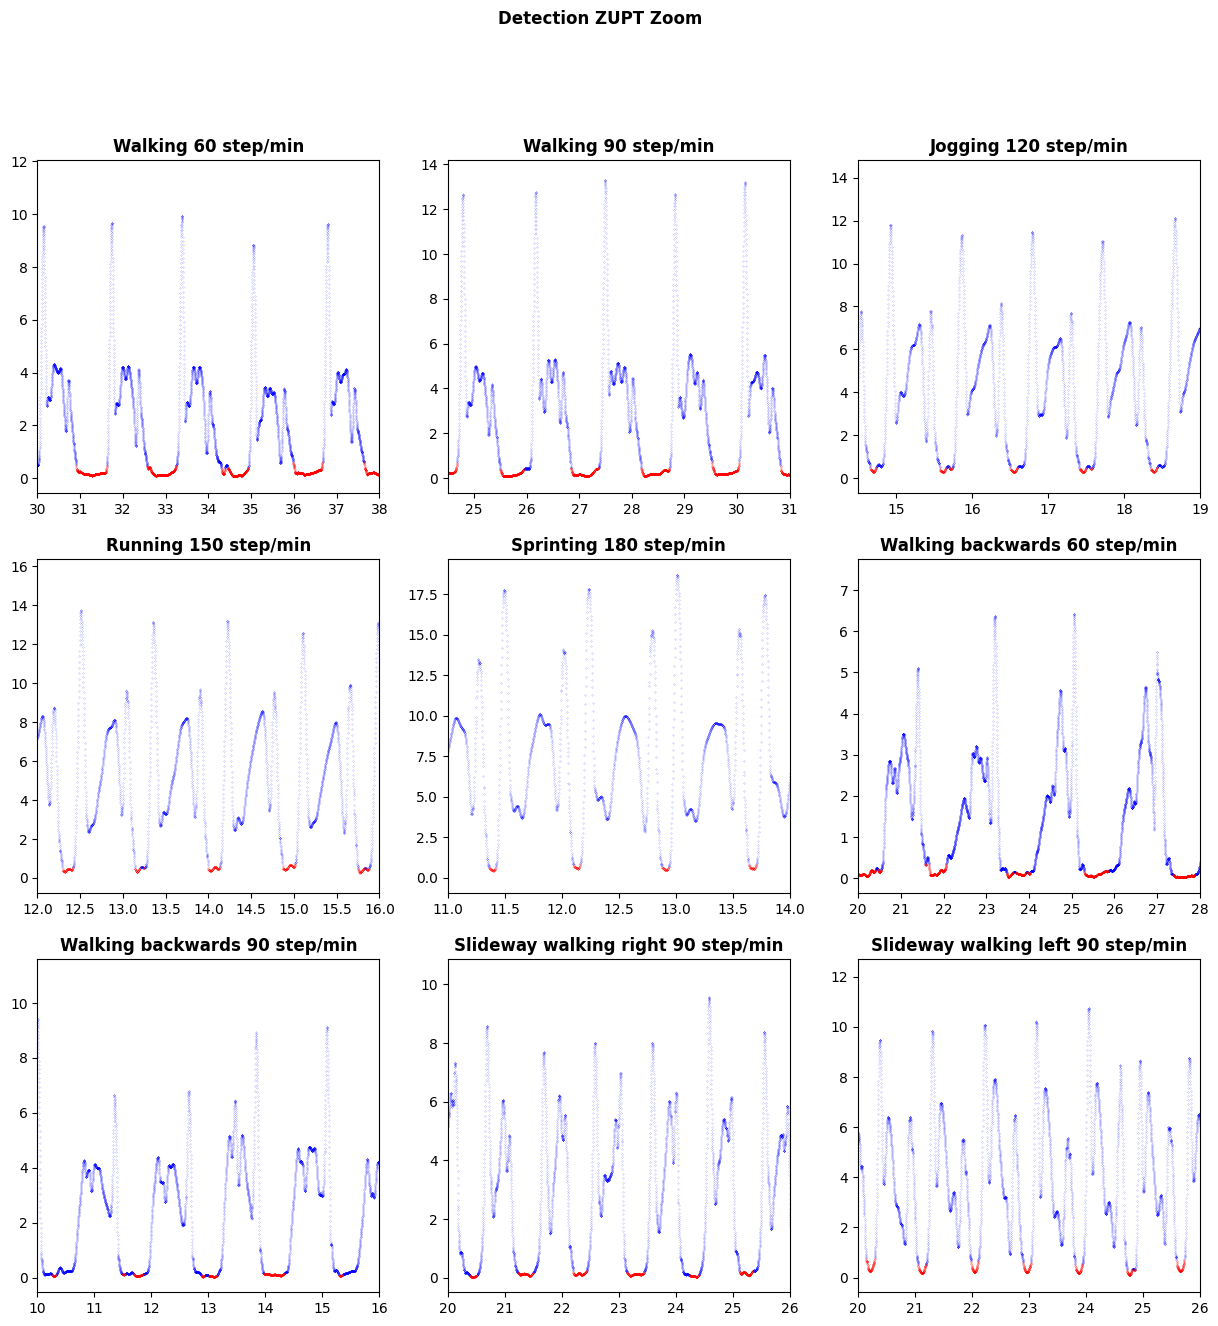

In [56]:
sp.plot_detection_zupt(sp_200_df,sp_400_df,sp_600_df,sp_800_df,sp_1000_df,sp_1200_df,sp_1400_df,sp_1600_df,sp_1800_df,
                    30,38,24.5,31,14.5,19,12,16,11,14,20,28,10,16,20,26,20,26)

---
## **5. Post Process Labeling to correct some values**
---

All the values between the first and last ZUPT detection are reassignated as ZUPT

In [57]:
sp_df = (sp_100_df, sp_200_df, sp_300_df, sp_400_df, sp_500_df,
         sp_600_df, sp_700_df, sp_800_df, sp_900_df, sp_1000_df,
         sp_1100_df, sp_1200_df, sp_1300_df, sp_1400_df, sp_1500_df,
         sp_1600_df, sp_1700_df, sp_1800_df)
peaks_df = (df_peaks_100, df_peaks_200, df_peaks_300, df_peaks_400, df_peaks_500,
            df_peaks_600, df_peaks_700, df_peaks_800, df_peaks_900, df_peaks_1000,
            df_peaks_1100, df_peaks_1200, df_peaks_1300, df_peaks_1400, df_peaks_1500,
            df_peaks_1600, df_peaks_1700, df_peaks_1800)
activities = ('walk_60', 'walk_60',
              'walk_90', 'walk_90',
              'jogg_120','jogg_120',
              'run_150','run_150',
              'sprint_180','sprint_180',
              'walk_b_60','walk_b_60',
              'walk_b_90','walk_b_90',
              'slide_right', 'slide_right',
              'slide_left', 'slide_left')
sp_df = map(sp.post_processing_labeling, sp_df, peaks_df, activities)
sp_df_lst = list(sp_df)
for i in range(0,len(sp_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
    exec(f'sp_{x[i]}_df = sp_df_lst[i]')

c:\Users\Eudald\OneDrive - personalmicrosoftsoftware.uci.edu\NEVERLOST\01_Quarterly_Reports_&_publications\2024 IEEE JSPIN - SVM Journal\Motion Classification\signal_processing_functions.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'].loc[j] = 'ZUPT_' + activity;


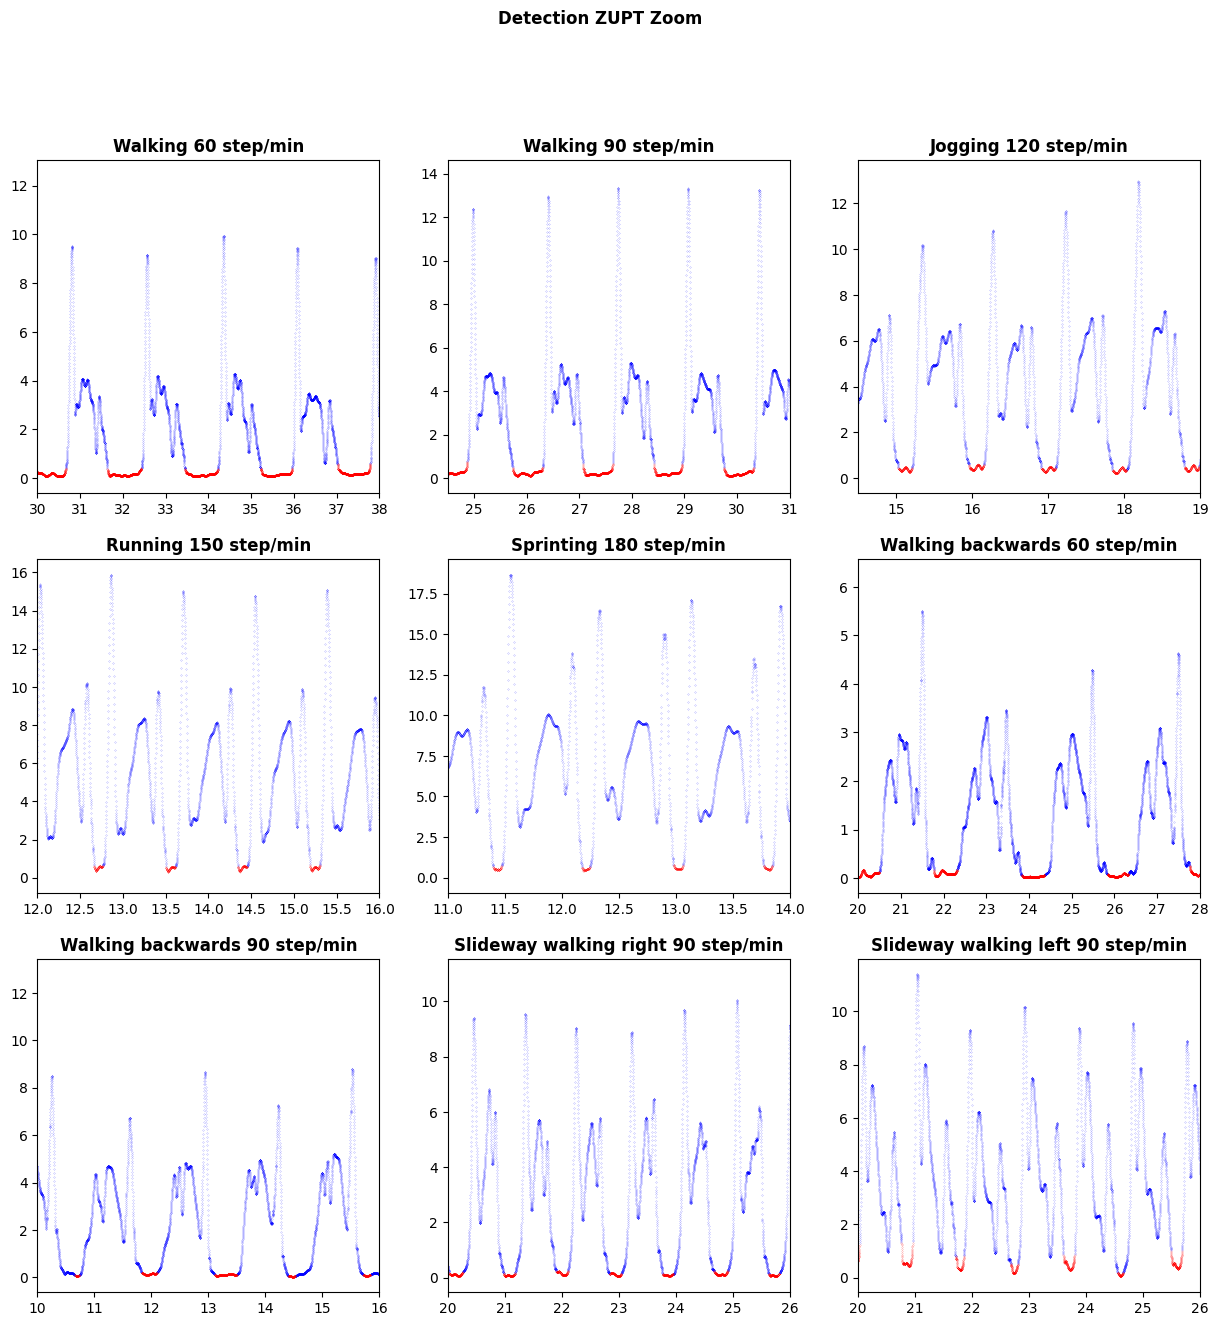

In [58]:
sp.plot_detection_zupt(sp_100_df,sp_300_df,sp_500_df,sp_700_df,sp_900_df,sp_1100_df,sp_1300_df,sp_1500_df,sp_1700_df,
                    30,38,24.5,31,14.5,19,12,16,11,14,20,28,10,16,20,26,20,26)

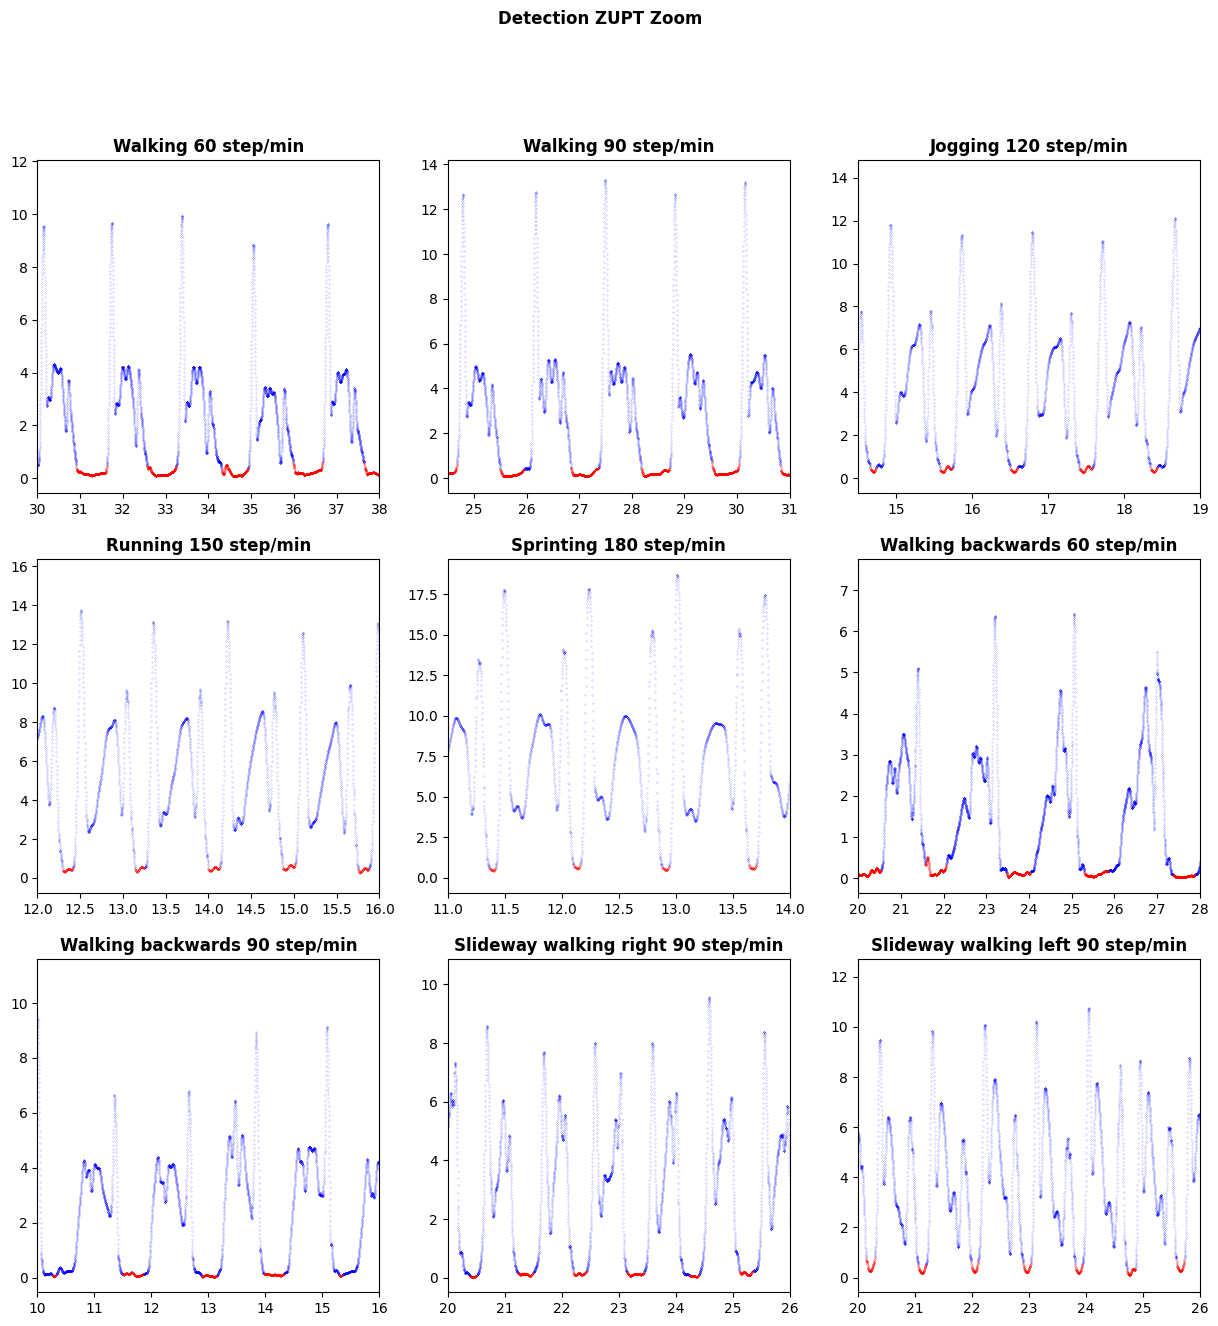

In [59]:
sp.plot_detection_zupt(sp_200_df,sp_400_df,sp_600_df,sp_800_df,sp_1000_df,sp_1200_df,sp_1400_df,sp_1600_df,sp_1800_df,
                    30,38,24.5,31,14.5,19,12,16,11,14,20,28,10,16,20,26,20,26)

---
## **6. Export Supervised Datasets**
---

In [60]:
# Create directory for saving CSVs if it doesn't exist
save_dataframes_folder = current_directory+'\\2_labeled_datasets\\'+data+'\\'
os.makedirs(save_dataframes_folder, exist_ok=True)

sp_dataframes = [
    sp_100_df, sp_200_df, sp_300_df, sp_400_df, sp_500_df,
    sp_600_df, sp_700_df, sp_800_df, sp_900_df, sp_1000_df,
    sp_1100_df, sp_1200_df, sp_1300_df, sp_1400_df, sp_1500_df,
    sp_1600_df, sp_1700_df, sp_1800_df
]

# Save each DataFrame to a CSV file
for i, df in enumerate(sp_dataframes, start=1):
    csv_filename = f"x_{i * 100}_df.csv"
    df.to_csv(os.path.join(save_dataframes_folder, csv_filename), index=False)

print("DataFrames have been saved successfully.")

DataFrames have been saved successfully.


In [61]:
sp_200_df

timestamp       acc      gyro label
0       0.030625  0.986566  0.015525  ZUPT
1       0.031875  0.986481  0.015458  ZUPT
2       0.033125  0.986428  0.015378  ZUPT
3       0.034375  0.986404  0.015294  ZUPT
4       0.035625  0.986529  0.015214  ZUPT
...          ...       ...       ...   ...
49091  61.394375  0.980728  0.017432  ZUPT
49092  61.395625  0.980880  0.017415  ZUPT
49093  61.396875  0.980899  0.017397  ZUPT
49094  61.398125  0.980922  0.017412  ZUPT
49095  61.399375  0.980979  0.017418  ZUPT

[49096 rows x 4 columns]

---
## **7. Export Train & Test Supervised Datasets**
---

In [62]:
# train = pd.concat([sp_100_df, sp_300_df, sp_500_df, sp_700_df, sp_900_df, sp_1100_df, sp_1300_df, sp_1500_df, sp_1700_df])
# test = pd.concat([sp_200_df, sp_400_df, sp_600_df, sp_800_df, sp_1000_df, sp_1200_df, sp_1400_df, sp_1600_df, sp_1800_df])

# train.to_csv(save_dataframes_folder+'2sig_train_df.csv')
# test.to_csv(save_dataframes_folder+'2sig_test_df.csv')

In [63]:
# test.head()

In [64]:
# np.shape(test) 

In [65]:
# train_6sig = pd.concat([exp_100_df, exp_300_df, exp_500_df, exp_700_df, exp_900_df, exp_1100_df, exp_1300_df, exp_1500_df, exp_1700_df])
# test_6sig = pd.concat([exp_200_df, exp_400_df, exp_600_df, exp_800_df, exp_1000_df, exp_1200_df, exp_1400_df, exp_1600_df, exp_1800_df])

# train_6sig.to_csv(save_dataframes_folder+'6sig_train_df.csv')
# test_6sig.to_csv(save_dataframes_folder+'6sig_test_df.csv')

In [66]:
# test_6sig.head()